In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset .csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
features = ['Average Cost for two', 'Price range', 'Votes', 'Cuisines', 'Has Table booking',
            'Has Online delivery', 'City', 'Currency', 'Country Code']
target = ['Aggregate rating']

data = df[features + target].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Price range           9551 non-null   int64  
 2   Votes                 9551 non-null   int64  
 3   Cuisines              9542 non-null   object 
 4   Has Table booking     9551 non-null   object 
 5   Has Online delivery   9551 non-null   object 
 6   City                  9551 non-null   object 
 7   Currency              9551 non-null   object 
 8   Country Code          9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 746.3+ KB


In [ ]:
categorical_cols = ['Cuisines', 'Has Table booking', 'Has Online delivery', 'City', 'Currency']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,Average Cost for two,Price range,Votes,Cuisines,Has Table booking,Has Online delivery,City,Currency,Country Code,Aggregate rating
0,1100,3,314,920,1,0,73,0,162,4.8
1,1200,3,591,1111,1,0,73,0,162,4.5
2,4000,4,270,1671,1,0,75,0,162,4.4
3,1500,4,365,1126,0,0,75,0,162,4.9
4,1500,4,229,1122,1,0,75,0,162,4.8


In [ ]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.2073120993354943
Mean Squared Error: 0.10247751041752899
R-squared: 0.9547117554887035


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-34-31249569c68b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


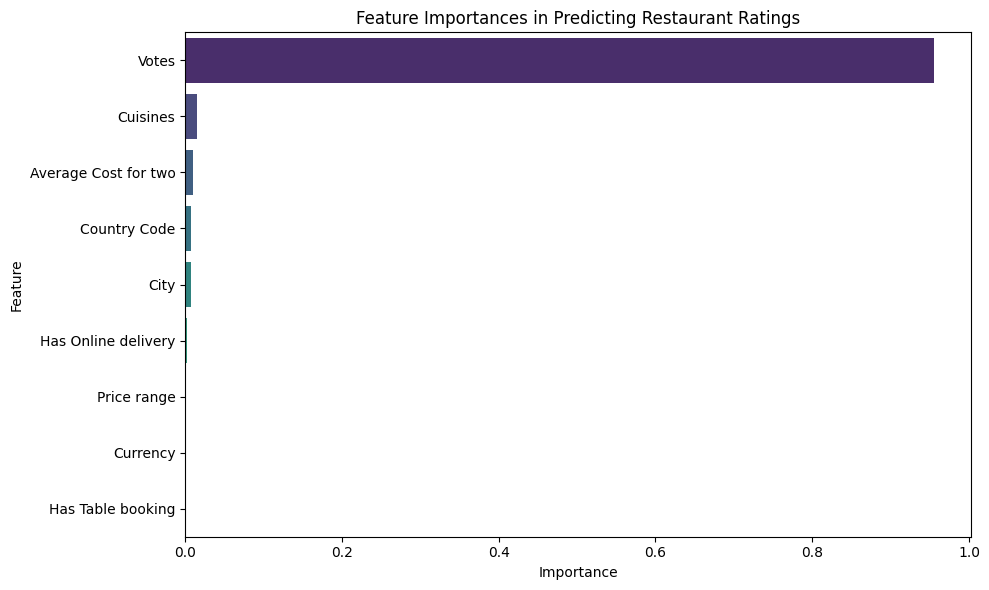

,Feature,Importance
2,Votes,0.955108
3,Cuisines,0.015289
0,Average Cost for two,0.009522
8,Country Code,0.007831
6,City,0.006885
5,Has Online delivery,0.002023
1,Price range,0.001539
7,Currency,0.000929
4,Has Table booking,0.000873


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#analyze feature importances
feature_importances = model.feature_importances_ #this will calculate the importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in Predicting Restaurant Ratings')
plt.tight_layout()
plt.show()

importance_df